In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("garymk/movielens-25m-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'movielens-25m-dataset' dataset.
Path to dataset files: /kaggle/input/movielens-25m-dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.listdir(path)

['ml-25m']

In [5]:
path = os.path.join(path, "ml-25m")

In [6]:
movies = pd.read_csv(os.path.join(path, "movies.csv"))
ratings = pd.read_csv(os.path.join(path, "ratings.csv"))
tags = pd.read_csv(os.path.join(path, "tags.csv"))
links = pd.read_csv(os.path.join(path, "links.csv"))

In [7]:
dataset = [movies, ratings, tags, links]
for data in dataset:
    print(data.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


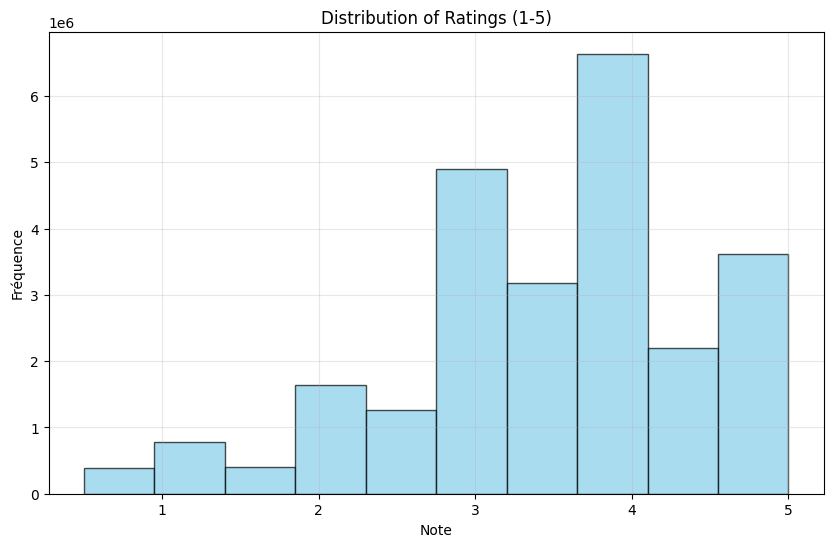

In [9]:
# Distribution of rating

plt.figure(figsize=(10, 6), facecolor='none')
ratings['rating'].hist(bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings (1-5)')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.grid(alpha=0.3)
plt.show()

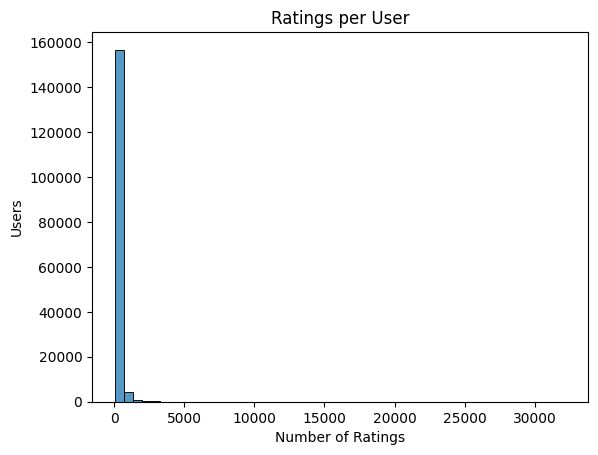

In [10]:
#  Number of Ratings per User

user_counts = ratings.groupby("userId")['rating'].count()

plt.figure()
sns.histplot(user_counts, bins=50)
plt.title("Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Users")
plt.show()

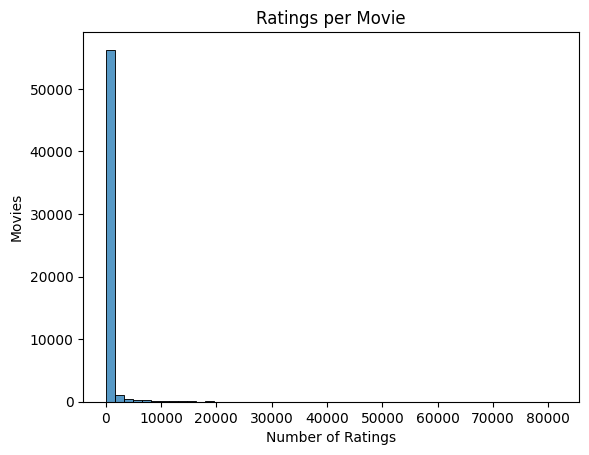

In [11]:
# Number of Ratings per Movie

movie_counts = ratings.groupby("movieId")['rating'].count()

plt.figure()
sns.histplot(movie_counts, bins=50)
plt.title("Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Movies")
plt.show()

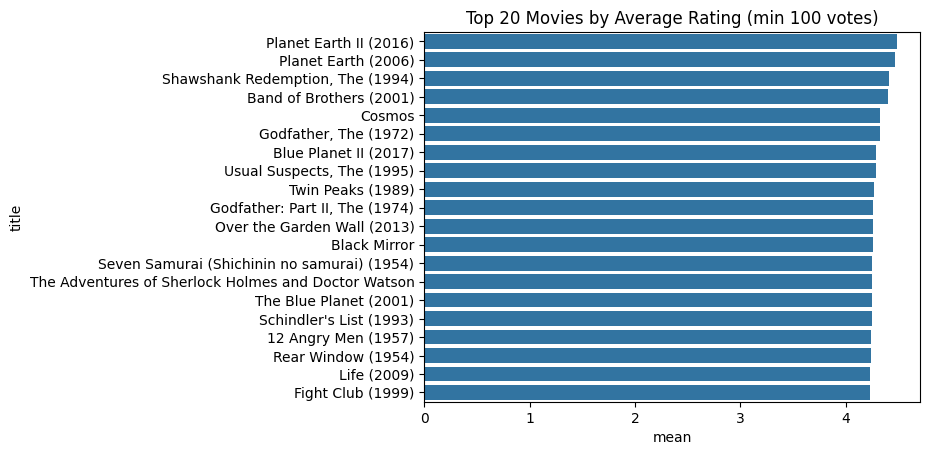

In [12]:
# Top 20 Movies by Average Rating (min 100 ratings)

movie_stats = ratings.groupby("movieId")['rating'].agg(['mean', 'count'])
movie_stats = movie_stats[movie_stats['count'] >= 100]

top20 = movie_stats.sort_values('mean', ascending=False).head(20).merge(movies, on='movieId')

plt.figure()
sns.barplot(data=top20, y="title", x="mean")
plt.title("Top 20 Movies by Average Rating (min 100 votes)")
plt.show()

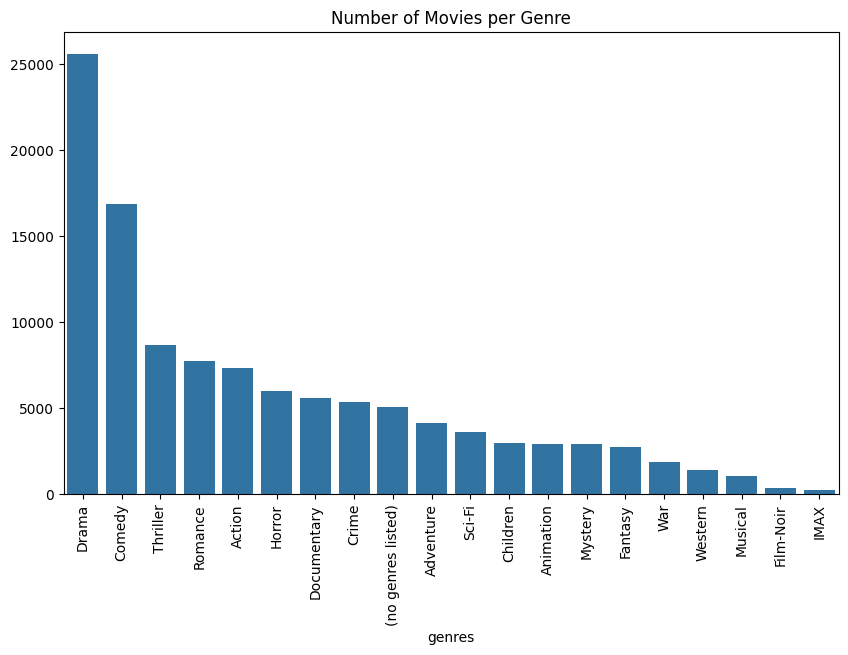

In [13]:
genre_counts = movies['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Movies per Genre")
plt.show()

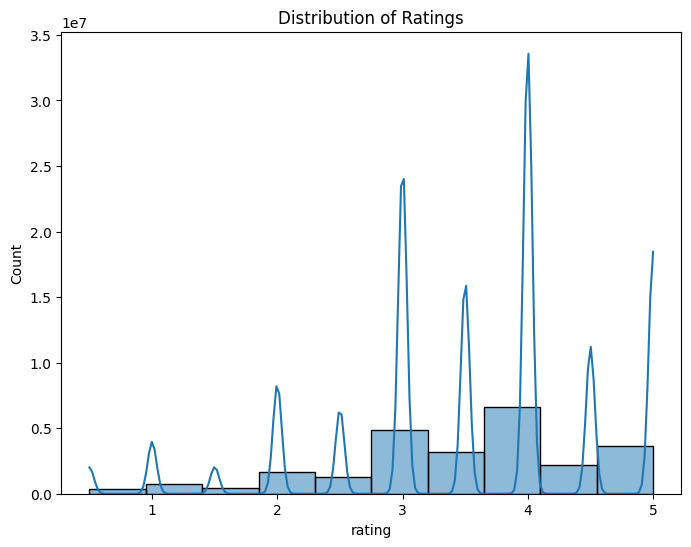

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.show()

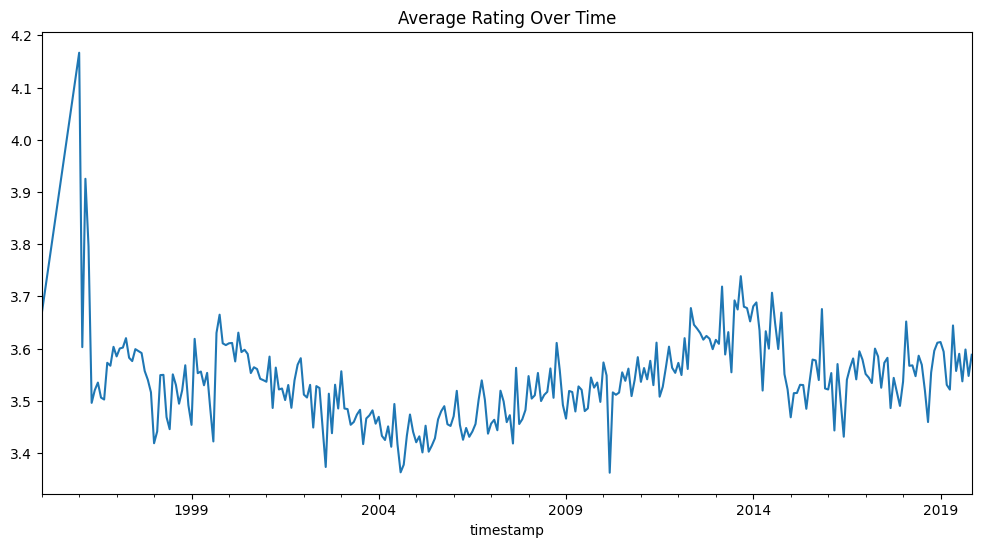

In [15]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
avg_rating_time = ratings.groupby(ratings['timestamp'].dt.to_period("M"))['rating'].mean()
avg_rating_time.plot(figsize=(12,6))
plt.title("Average Rating Over Time")
plt.show()

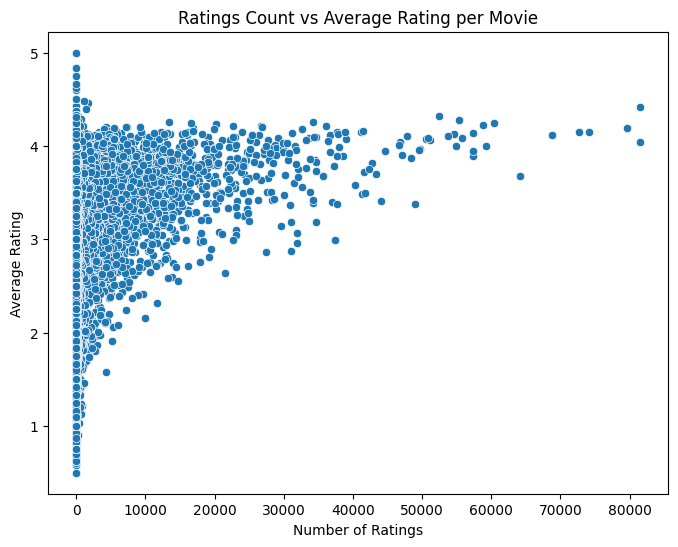

In [16]:
movie_stats = ratings.groupby('movieId').agg({'rating':'mean','userId':'count'})
plt.figure(figsize=(8,6))
sns.scatterplot(x=movie_stats['userId'], y=movie_stats['rating'])
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.title("Ratings Count vs Average Rating per Movie")
plt.show()

In [ ]:
ratings_movies = ratings.merge(movies, on='movieId')
ratings_movies = ratings_movies.assign(genre=ratings_movies['genres'].str.split('|')).explode('genre')
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='rating', data=ratings_movies)
plt.xticks(rotation=90)
plt.title("Ratings Distribution per Genre")
plt.show()

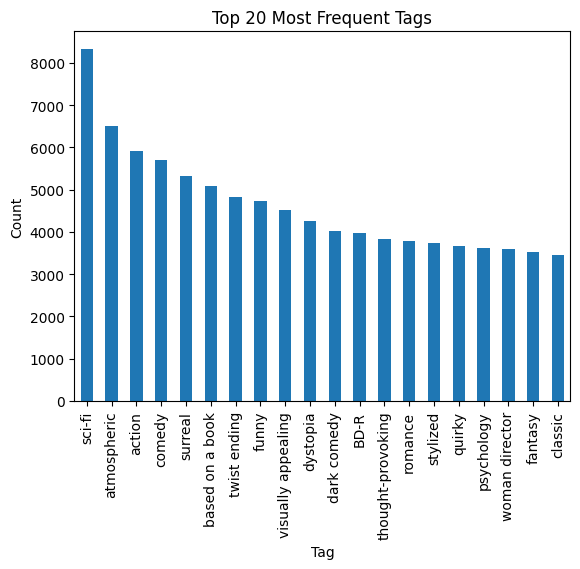

In [9]:

tags['tag'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Frequent Tags")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.show()


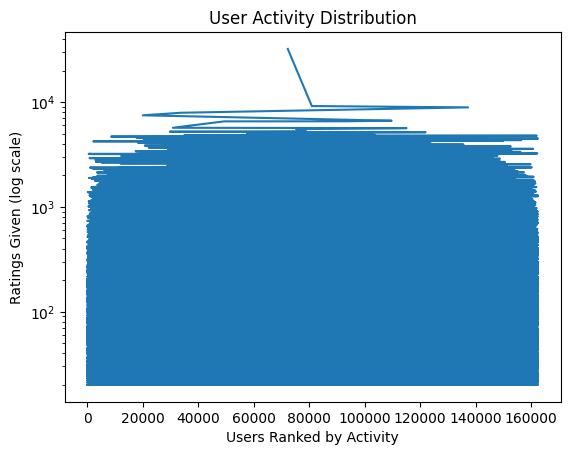

In [10]:

user_activity = ratings['userId'].value_counts()
user_activity.plot()
plt.yscale("log")
plt.title("User Activity Distribution")
plt.xlabel("Users Ranked by Activity")
plt.ylabel("Ratings Given (log scale)")
plt.show()


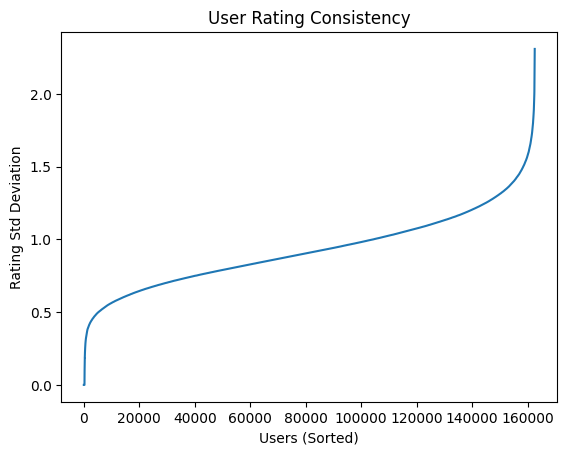

In [12]:
user_std = ratings.groupby('userId')['rating'].std()

import matplotlib.pyplot as plt
user_std.sort_values().reset_index(drop=True).plot()
plt.xlabel("Users (Sorted)")
plt.ylabel("Rating Std Deviation")
plt.title("User Rating Consistency")
plt.show()


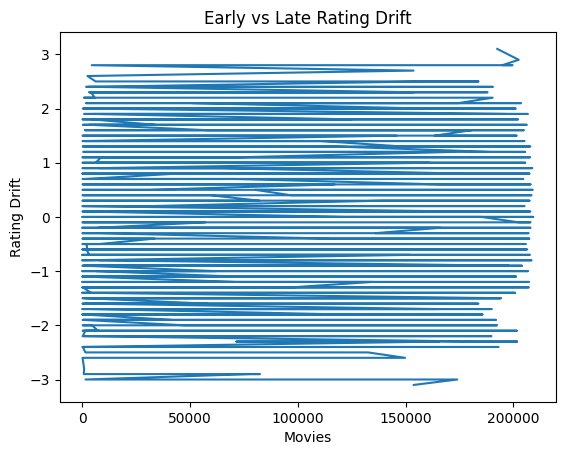

In [8]:
ratings_sorted = ratings.sort_values('timestamp')

early = ratings_sorted.groupby('movieId').head(5).groupby('movieId')['rating'].mean()
late = ratings_sorted.groupby('movieId').tail(5).groupby('movieId')['rating'].mean()

drift = (late - early).dropna()

drift.sort_values().plot()
plt.xlabel("Movies")
plt.ylabel("Rating Drift")
plt.title("Early vs Late Rating Drift")
plt.show()